# Airflow - Workshop 1

## Configurer Apache Airflow avec Docker-Compose

### 1 . Avant de commencer

Cette procédure suppose une familiarité avec Docker et Docker Compose.

Docker : Une plateforme de virtualisation de conteneurs qui permet d'exécuter des applications dans des environnements isolés, appelés conteneurs, afin de faciliter le déploiement et la gestion d'applications sur différents systèmes d'exploitation et infrastructures.

Docker-compose : Est un outil de gestion de conteneurs qui permet de définir et de gérer plusieurs conteneurs Docker en même temps

### 2 . Récupération docker-compose.yaml

Pour le déploiement d'Airflow sur Docker Compose, il est nécessaire de récupérer le fichier docker-compose.yaml

In [ ]:
curl -LfO 'https://airflow.apache.org/docs/apache-airflow/2.5.1/docker-compose.yaml'

Ce fichier contient plusieurs définitions de service:

airflow-init : Le service d'initialisation.

airflow-scheduler : Le planificateur surveilletoutes les tâches et les DAG, puis déclenche le les instances de tâches une fois leurs dépendances terminées.

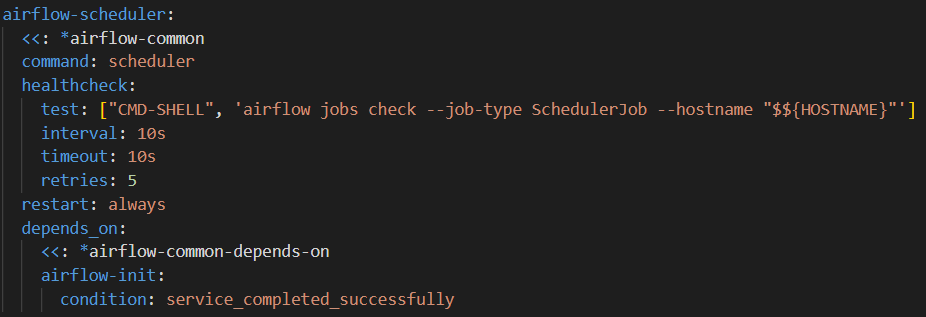

airflow-webserver : Le serveur Web est disponible sur http://localhost:8080.

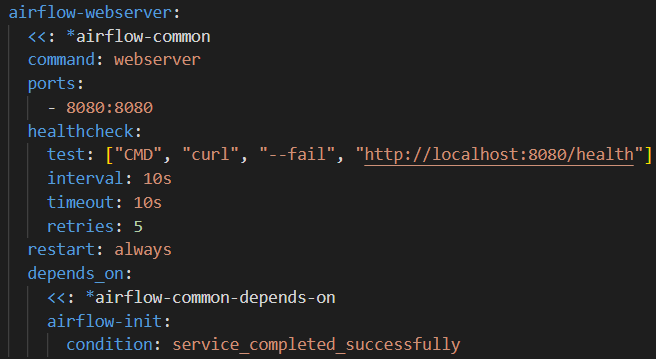

airflow-worker : Le travailleur qui exécute les tâches données par le planificateur.

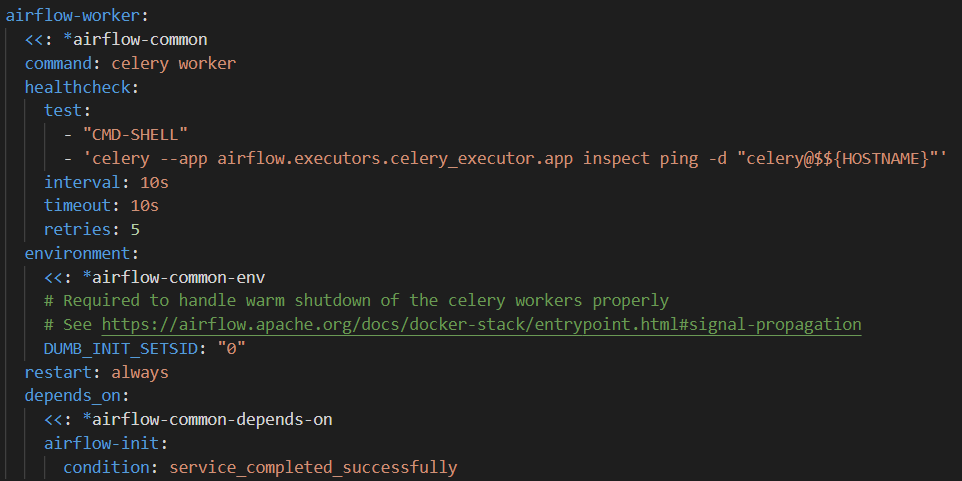

postgres : La base de données.

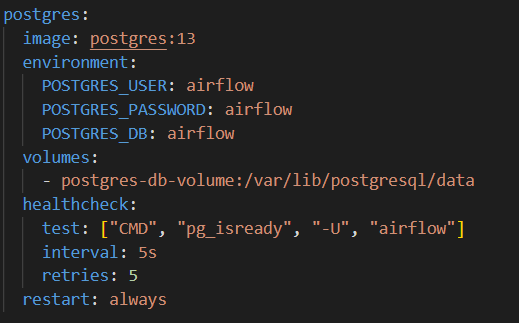

redis - Les redis : courtier qui transmet les messages du planificateur au travailleur.

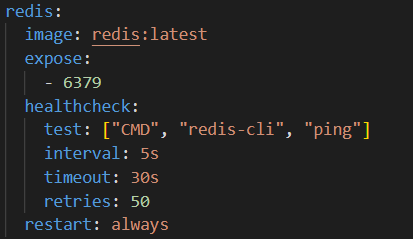

### 3 . Initialisation de l'environnement 

Avant de démarrer Airflow pour la première fois, vous devez préparer votre environnement, c'est-à-dire créer les fichiers nécessaires, répertoires et initialiser la base de données.

In [ ]:
mkdir -p ./dags ./logs ./plugins
echo -e "AIRFLOW_UID=$(id -u)" > .env

La première commande crée trois répertoires dans le répertoire actuel (./), nommément dags, logs et plugins. L'option -p signifie que les répertoires parents seront également créés si nécessaire.

La deuxième commande crée un fichier nommé .env dans le répertoire actuel et y écrit une variable d'environnement appelée AIRFLOW_UID contenant l'ID utilisateur de l'utilisateur courant

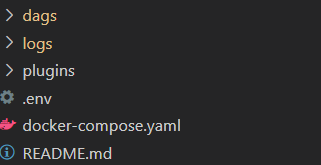

"dags" : C'est un répertoire où vous pouvez stocker des définitions de tâches d'Airflow,qui sont des workflows écrits en Python. Dans ce répertoire, vous pouvez créer un fichier Python pour chaque tâche ou un groupe de tâches liées.

"logs" : Ce répertoire est utilisé par Airflow pour stocker les fichiers de journalisation (logs) générés lors de l'exécution des tâches.

"plugins" : Ce répertoire est utilisé pour stocker des plugins personnalisés pour Airflow. Les plugins sont des modules Python qui étendent les fonctionnalités d'Airflow, tels que des connecteurs personnalisés ou des opérateurs personnalisés.

### 4 . Initialiser la base de données

Sur tous les systèmes d'exploitation, vous devez exécuter les migrations de base de données et créer le premier compte utilisateur.

In [ ]:
docker compose up airflow-init

Une fois l'initialisation terminée, vous devriez voir un message comme celui-ci:

In [ ]:
airflow-init_1       | Upgrades done
airflow-init_1       | Admin user airflow created
airflow-init_1       | 2.5.1
start_airflow-init_1 exited with code 0

###  5 . Exécution d'un Airflow

Vous pouvez maintenant démarrer tous les services avec :

In [ ]:
docker compose up -d

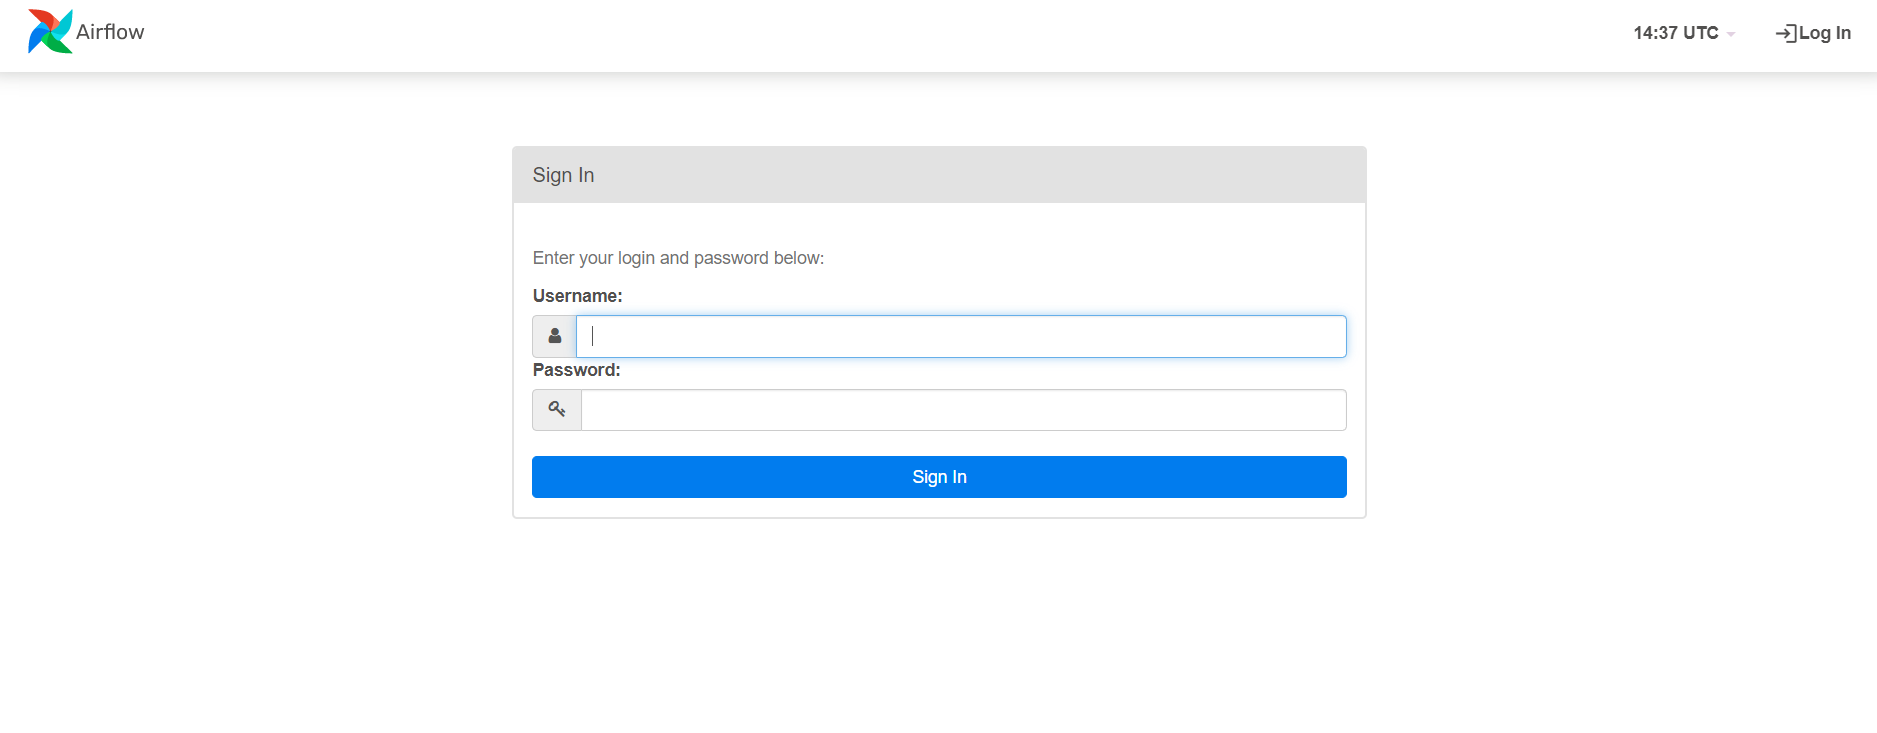

Vous pouvez vérifier l'état des conteneurs et vous assurer qu'aucun conteneur n'est dans un état malsain:

In [ ]:
docker compose ps

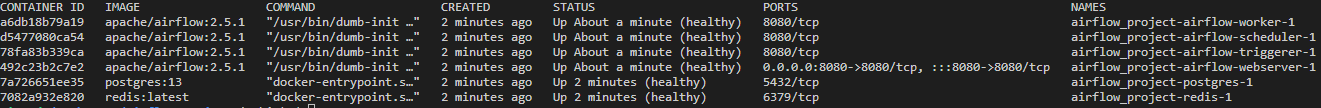